In [1]:
import matplotlib.pyplot as plt

## Figures, Subplots

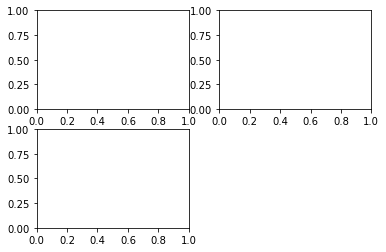

In [2]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

plt.show()

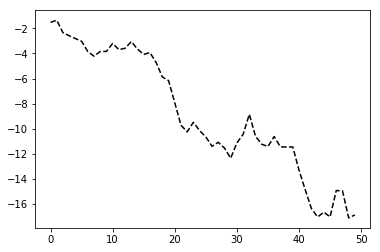

In [6]:
import numpy as np
from numpy.random import randn

plt.plot(randn(50).cumsum(), 'k--')
plt.show()

ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

plt.show()

In [8]:
fig, axes = plt.subplots(2, 3)
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001CA7E835470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001CA7EAF0860>]], dtype=object)

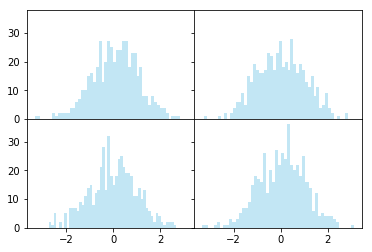

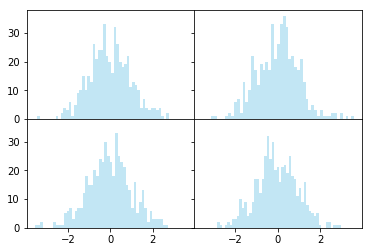

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(randn(500), bins=50, color='skyblue', alpha=0.5)
        
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

Colors, Markers, Line styles

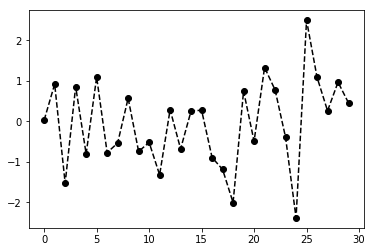

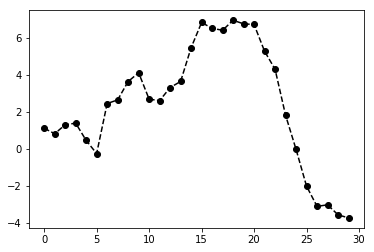

In [14]:
plt.plot(randn(30).cumsum(), 'ko--')
plt.show()

plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
plt.show()

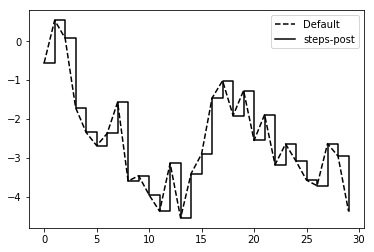

In [26]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')
plt.show()

## Ticks, Labels, and Legends

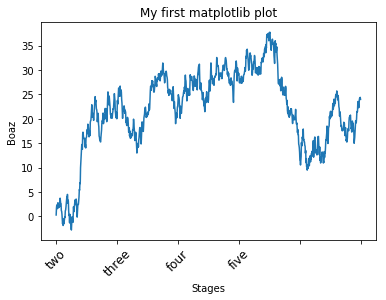

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.plot(randn(1000).cumsum())

labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=45, fontsize='large')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

plt.show()

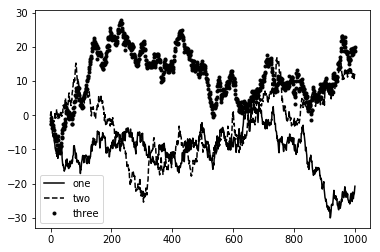

In [26]:
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')

ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')
plt.show()

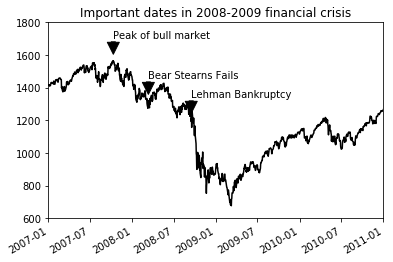

In [36]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
data = pd.read_csv('./visualize_data/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']
spx.plot(ax=ax, style='k-')
crisis_data = [(datetime(2007, 10, 11), 'Peak of bull market'), (datetime(2008, 3, 12), 'Bear Stearns Fails'),(datetime(2008, 9, 15), 'Lehman Bankruptcy')]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 50), xytext=(date, spx.asof(date) + 200), arrowprops=dict(facecolor='black'), horizontalalignment='left', verticalalignment='top')

# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])
ax.set_title('Important dates in 2008-2009 financial crisis')

plt.show()

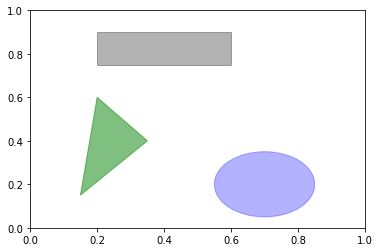

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.show()

## Matplotlib configuration

In [38]:
plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace', 'weight' : 'bold', 'size' : '10'}
plt.rc('font', **font_options)

## Plotting Functions in pandas

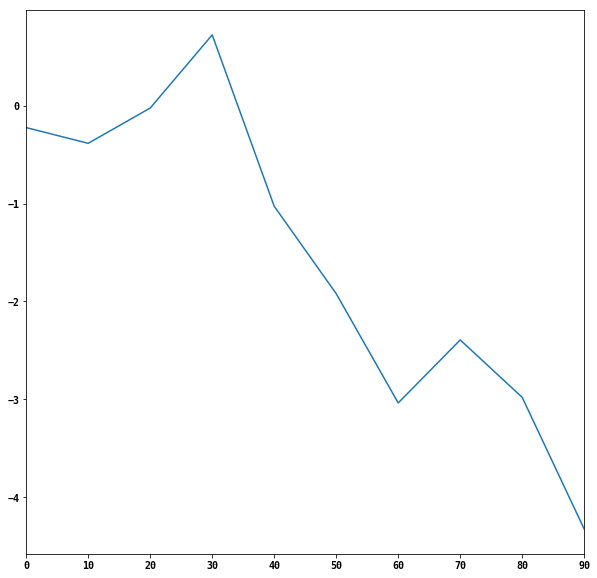

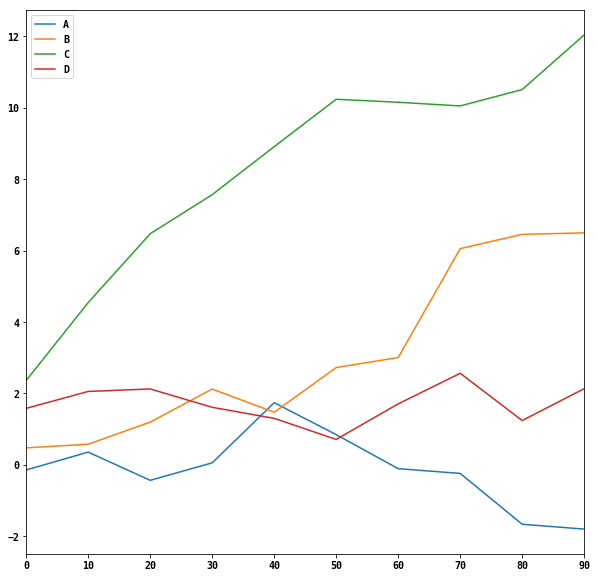

In [43]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

df = pd.DataFrame(np.random.randn(10, 4).cumsum(0), columns=['A', 'B', 'C', 'D'], index=np.arange(0, 100, 10))
df.plot()
plt.show()

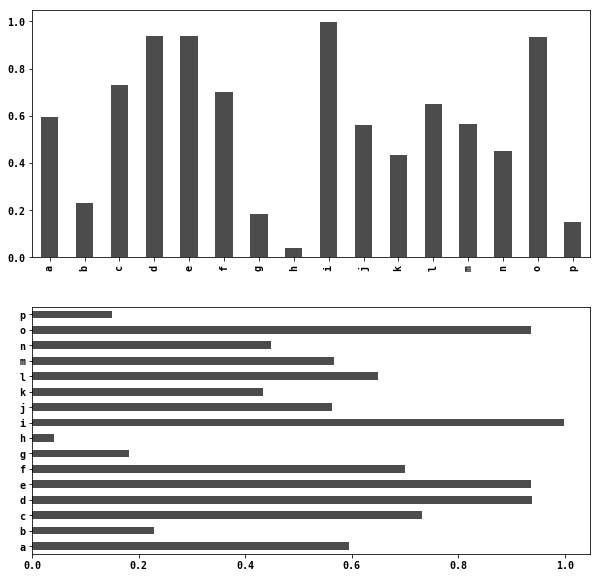

In [46]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)
plt.show()

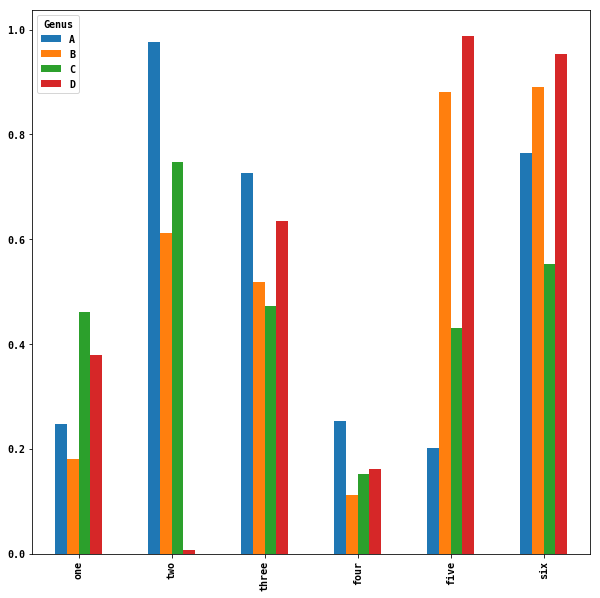

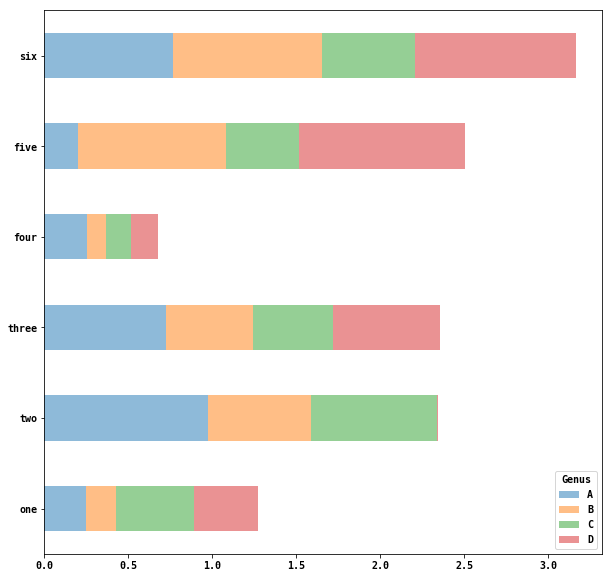

In [49]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'], columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

df.plot(kind='bar')
df.plot(kind='barh', stacked=True, alpha=0.5)
plt.show()

In [61]:
tips = pd.read_csv('./visualize_data/tips.csv')

party_counts = pd.crosstab(tips.day, tips.size)
party_counts
print(party_counts)

party_counts = party_counts.ix[:, 2:5]

# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)

#party_pcts.plot(kind='bar', stacked=True)

col_0  1708
day        
Fri      19
Sat      87
Sun      76
Thur     62


C:\Users\hjben\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  import sys


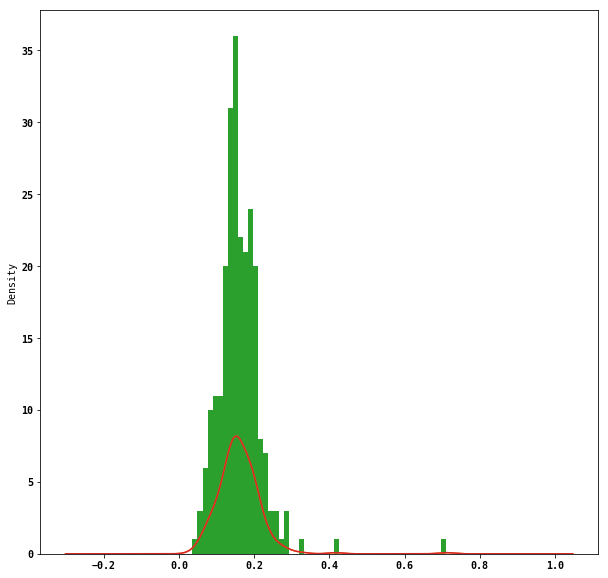

In [58]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

tips['tip_pct'].plot(kind='kde')
plt.show()

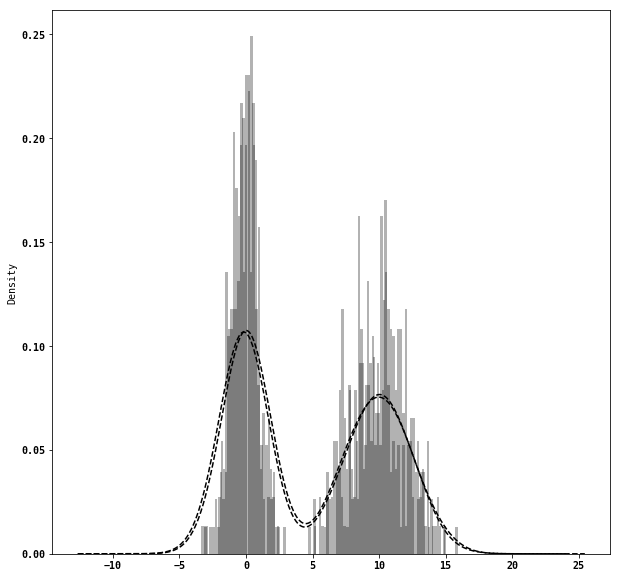

In [64]:
comp1 = np.random.normal(0, 1, size=200) # N(0, 1)
comp2 = np.random.normal(10, 2, size=200) # N(10, 4)

values = pd.Series(np.concatenate([comp1, comp2]))
values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')
plt.show()

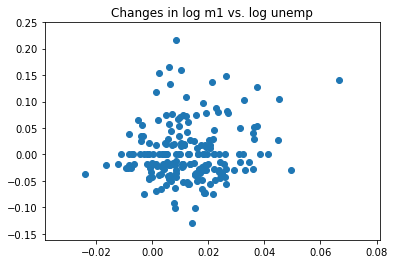

In [38]:
macro = pd.read_csv('./visualize_data/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s' % ('m1', 'unemp'))
plt.show()